# <h1>Taller 4</h1>

1. Implemente un método que retorne la subsecuencia común más larga (SCL) apartir de la matriz C construida por el algoritmo de PD que calcula la longitud de la SCL.

In [28]:
import math
import numpy as np
import pylab as pl
import random as rnd
%matplotlib inline

In [29]:
def SCL(X , Y):
   
    q = len(X)
    w = len(Y)
    t = [[None]*(w+1) for i in xrange(q+1)]
 
    for i in range(q+1):
        for j in range(w+1):
            if i == 0 or j == 0 :
                t[i][j] = 0
            elif X[i-1] == Y[j-1]:
                t[i][j] = t[i-1][j-1]+1
            else:
                t[i][j] = max(t[i-1][j] , t[i][j-1])
    return t[q][w]


In [30]:
X = "ingenieria"
Y = "diseño"
print SCL(X, Y)

2


2. a) Implemente un método para determinar los cortes que se deben realizar a partir de la solución de PD que encuentra el valor de la solución óptima.

In [31]:
import copy

maxp= {}

def cut_rod(n,p):
    if n==0:
        return 0,[]
    q=-999
   
    if n in maxp.keys():
        return maxp[n][0],copy.copy(maxp[n][1])
    c = []
    for i in range(1,n+1): 
            
        sv,sc =  cut_rod(n-i,p)
            
        if sv + p[i] > q:
            sc.append(i)
            c = sc
            q = sv + p[i]
   
    maxp[n] = (q,copy.copy(c))
    
    return q,c

p={1:1,2:5,3:8,4:12,5:10,6:1,7:1,8:23,9:24,10:30}
sol = cut_rod(8,p)
print sol

(24, [4, 4])


b) Realice una comparación experimental sistemática de los algoritmos para diferentes valores  de p y de n.

In [32]:
import numpy as np

global C

def lcs(X,Y):
    global C
    C = np.ones((len(X)+1,len(Y)+1))*-1
    lcs3(X,Y,len(X),len(Y))
    return C[len(X)-1,len(Y)-1], C
    
def lcs2(x,y,i,j):
    if i == 0 or j == 0:
        return 0
    if x[i-1]==y[j-1]:
        return lcs2(x,y,i-1,j-1)+1
    else:
        return max(lcs2(x,y,i-1,j),lcs2(x,y,i,j-1))
    
def lcs3(x,y,i,j):
    global C
    if C[i,j] == -1:
        if i == 0 or j == 0:
            C[i,j] = 0
        else:
            if x[i-1]==y[j-1]:
                C[i,j] = lcs3(x,y,i-1,j-1)+1
            else:
                C[i,j] = max(lcs3(x,y,i-1,j),lcs3(x,y,i,j-1))
                
    return C[i,j]

In [61]:
import time
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps


def time_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        lcs('ingenieria','diseño')
        toc = time.clock()#get final time
        results.append((toc-tic)*10000000)
    return  results

def time_analysis2(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        lcs2('ingenieria','diseño',3,5)
        toc = time.clock()#get final time
        results.append((toc-tic)*1000)
    return  results

def time_analysis3(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        lcs3('ingenieria','diseño',3,5)
        toc = time.clock()#get final time
        results.append((toc-tic)*100000)
    return  results

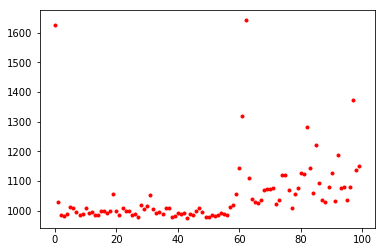

In [62]:
pl.clf()
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.', color ='r')



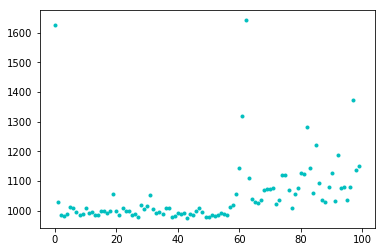

In [63]:
pl.clf()
x = np.arange(100)
z = np.array(time_analysis2(100))
pl.plot(x, y, 'k.', color ='c')

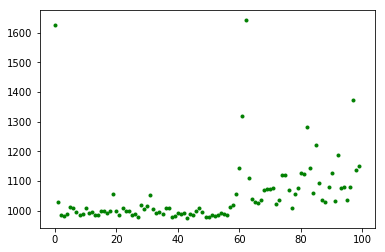

In [64]:
pl.clf()
x = np.arange(100)
w = np.array(time_analysis3(100))
pl.plot(x, y, 'k.', color ='g')

4.En el rio atrato hay n embarcaderos, en cada uno de ellos se puede alquilar un bote para realizar un viaje rio abajo a otro embarcadero. Existe una tabla de tarifas que indica el costo del viaje del embarcadero i al j, para i, j = 1,2,...,n  (i<j), puede pasar que un viaje de i a j sea más caro que una serie de viajes sucesivos intermedios, no hay un costo asociado a cambiar de bote en algún embarcadero. El problema consiste en diseñar un algoritmo de PD que determine el costo mínimo para cada par de puntos i,j.

In [65]:
R = 3
C = 3
 
def minCost(cost, m, n):
 
    tc = [[0 for x in range(C)] for x in range(R)]
    tc[0][0] = cost[0][0]
 
    for i in range(1, m+1):
        tc[i][0] = tc[i-1][0] + cost[i][0]
    y
    for j in range(1, n+1):
        tc[0][j] = tc[0][j-1] + cost[0][j]
  
    for i in range(1, m+1):
        for j in range(1, n+1):
            tc[i][j] = min(tc[i-1][j-1], tc[i-1][j], tc[i][j-1]) + cost[i][j]
 
    return tc[m][n]
 

cost = [[1, 2, 3],
        [4, 8, 2],
        [1, 5, 3]]
print(minCost(cost, 2, 2))
 
# Tomado de http://www.geeksforgeeks.org/dynamic-programming-set-6-min-cost-path/

8
